In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
import pandas as pd
from astropy.table import Table, join, hstack, vstack

In [3]:
dust = np.load('../photoParallax/dust.npy')
source_id = np.load('../photoParallax/source_id.npy')
parallax = np.load('../photoParallax/parallax.npy')

In [4]:
dustTable = Table((dust, source_id, parallax), 
                  names=['dust', 'source_id', 'parallax'],
                  dtype = ['float64', 'int64', 'float64'])

In [5]:
tmass_match = Table.read('../photoParallax/tgas-matched-2mass.fits')

In [6]:
tgas = Table.read('../photoParallax/stacked_tgas.fits')

In [7]:
wise_match = Table.read('tgas-matched-wise.fits')

In [8]:
data = hstack((tgas, tmass_match, wise_match))

In [9]:
data.rename_column('source_id_1', 'source_id')

In [11]:
keys = ['source_id', 'parallax', 'parallax_error', 'phot_g_mean_mag', \
        'j_mag', 'h_mag', 'k_mag', 'w1mpro', 'w2mpro', 'w3mpro', 'w4mpro', \
        'h_snr', 'j_snr', 'k_snr', 'w1snr', 'w2snr', 'w3snr', 'w4snr', 'l', 'b']

In [13]:
alldata = join(dustTable, data[keys], keys='source_id')

In [14]:
alldata.keys()

['dust',
 'source_id',
 'parallax_1',
 'parallax_2',
 'parallax_error',
 'phot_g_mean_mag',
 'j_mag',
 'h_mag',
 'k_mag',
 'w1mpro',
 'w2mpro',
 'w3mpro',
 'w4mpro',
 'h_snr',
 'j_snr',
 'k_snr',
 'w1snr',
 'w2snr',
 'w3snr',
 'w4snr',
 'l',
 'b']

In [15]:
alldata = alldata[~np.isnan(alldata['w2mpro'])]

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


Text(0.5,1,'CMD for Wise + 2mass')

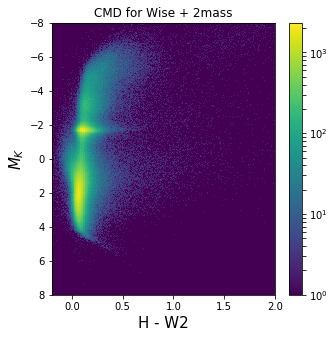

In [16]:
plt.figure(figsize=(5,5))
color = alldata['h_mag'] - alldata['w2mpro']
absmag = alldata['w1mpro'] + 5.*np.log10(alldata['parallax_1']) - 10

nbins = 300
xbins = np.linspace(-0.2, 2, nbins)
ybins = np.linspace(-8, 8, nbins)
H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('$M_K$', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('CMD for Wise + 2mass')



/anaconda3/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log10
  import sys
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)
/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:991: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


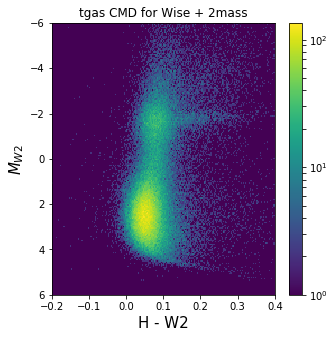

In [17]:
plt.figure(figsize=(5,5))
Q_J = 0.709
Q_H = 0.449
Q_K  = 0.302
select = (alldata['b'] > 45) & (alldata['w2snr'] > 10) & (alldata['h_snr'] > 10)
color = alldata['h_mag'][select] - alldata['w2mpro'][select] - Q_H*alldata['dust'][select]
absmag = alldata['w2mpro'][select] + 5.*np.log10(alldata['parallax_2'][select]) - 10

nbins = 200
xbins = np.linspace(-0.2, 0.4, nbins)
ybins = np.linspace(-6, 6, nbins)
H, xe, ye = np.histogram2d(color, absmag, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('$M_{W2}$', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('tgas CMD for Wise + 2mass')
plt.savefig('wise2massCMD.png')
plt.savefig('wise2massCMD.pdf')

In [18]:
plt.figure(figsize=(5,5))

nbins = 300
xbins = np.linspace(-0.2, 1, nbins)
ybins = np.linspace(0,15, nbins)
H, xe, ye = np.histogram2d(color, alldata['h_mag'], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('K', fontsize=15)
plt.gca().invert_yaxis()
plt.colorbar()
plt.title('Color color for Wise + 2mass')


ValueError: The dimension of bins must be equal to the dimension of the  sample x.

In [ ]:
plt.figure(figsize=(5,5))
color = alldata['h_mag'] - alldata['w2mpro']
nbins = 300
xbins = np.linspace(-0.2, 1, nbins)
ybins = np.linspace(-0.1,1, nbins)
H, xe, ye = np.histogram2d(color, alldata['dust'], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)
im.set_rasterized(True)
plt.xlabel('H - W2', fontsize=15)
plt.ylabel('E(B-V)', fontsize=15)
plt.colorbar()
plt.title('Color vs dust for Wise + 2mass')
plt.axvline(0, color='white', lw=2)
plt.savefig('wise2massColorDust.png')
plt.savefig('wise2massColorDust.pdf')

In [ ]:
plt.hist(alldata['dust'], histtype='step', log=True, lw=2)
plt.xlabel('E(B-V)')
plt.title('Anderson2018 Dust Values')
plt.savefig('Anderson2018Dustvalues.pdf')

In [ ]:
tmass = Table.read('tmassIDs-result.csv')
wise = Table.read('wiseIDs-result.csv')

In [ ]:
d = data.to_pandas()

In [ ]:
np.max(d['M_J'])

In [ ]:
plt.hist(d['E(B_V)'], log=True)

In [ ]:
nbins = 300
xbins = np.linspace(-0.5, 1.5, nbins)
ybins = np.linspace(-6, 7, nbins)
Q_J = 0.709
Q_K = 0.302
H, xe, ye = np.histogram2d(d['J_Ks'], d['M_J'], bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)

#plt.scatter(d['J_Ks'] + d['E(B_V)'], d['M_J'] + d['E(B_V)'], alpha = 0.01, s=1)
plt.gca().invert_yaxis()

In [ ]:
nbins = 300
xbins = np.linspace(-0.5, 1.5, nbins)
ybins = np.linspace(-6, 7, nbins)
Q_J = 0.709
Q_K = 0.302
H, xe, ye = np.histogram2d(d['J_Ks'] + d['E(B_V)']*(Q_J - Q_K), d['M_J'] + d['E(B_V)']*Q_J, bins=(xbins, ybins))
im = plt.pcolormesh(xe, ye, H.T + 1,
      norm=mpl.colors.LogNorm())#vmax=75))#, vmax=20) #, vmin=-100, vmax=100)

#plt.scatter(d['J_Ks'] + d['E(B_V)'], d['M_J'] + d['E(B_V)'], alpha = 0.01, s=1)
plt.gca().invert_yaxis()

In [ ]:
sess = tf.InteractiveSession()

In [ ]:
def myfun(X):
    return X[:,0] + X[:,1]**2 - np.sin(X[:,2])

In [ ]:
Photo_num = 2
batch_size = 5000
Photo = tf.placeholder( tf.float32, [None, Photo_num] )
Y = tf.placeholder( tf.float32, [None, 1] )



layer1 = tf.contrib.layers.fully_connected(Photo,10, activation_fn=tf.nn.relu)
layer2 = tf.contrib.layers.fully_connected(layer1,10, activation_fn=tf.nn.relu)
layer3 = tf.contrib.layers.fully_connected(layer2,2, activation_fn=None)



In [ ]:
layer3

In [ ]:
prediction = tf.slice(layer3,[0,0],[-1,1])
log_sigma = tf.slice(layer3,[0,1],[-1,1])

In [32]:
cost = tf.reduce_sum( tf.square(tf.subtract(Y,layer3)) * tf.exp(-log_sigma) + log_sigma )

In [33]:
train_step = tf.train.AdamOptimizer(3e-4).minimize(cost)

In [34]:
sess.run(tf.global_variables_initializer())

In [37]:
for i in range(1000):
    # load a batch of data with size batch_size
    ind = np.random.randint(low=0, high = len(d), size=(batch_size))
    #numpy_photo = np.random.uniform(low=0, high=10, size=(batch_size, Photo_num)).reshape(-1,Photo_num)
    numpy_photo = d[['J_Ks', 'M_J']].iloc[ind]
    numpy_A = d['E(B_V)'].iloc[ind].reshape(-1,1)
    #numpy_A = myfun(numpy_photo).reshape(-1,1)
    #print numpy_photo, numpy_A
    sess.run(train_step, feed_dict={Photo: numpy_photo, Y: numpy_A})
    


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [38]:
test_size = 100
nd = np.random.randint(low=0, high = len(d), size=(batch_size))
test_numpy_photo = d[['J_Ks', 'M_J']].iloc[ind]
test_numpy_A = d['E(B_V)'].iloc[ind].reshape(-1,1)
 
testresults = sess.run(layer3, feed_dict={Photo: test_numpy_photo})

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [40]:
testresults

array([[nan, nan],
       [nan, nan],
       [nan, nan],
       ...,
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=float32)

<Container object of 3 artists>

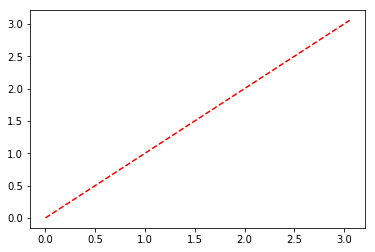

In [39]:
XL = np.linspace(0,np.max(data['E(B_V)']),100)
plt.plot(XL,XL,'--r')
plt.errorbar(test_numpy_A,testresults[:,0],yerr=testresults[:,1],fmt = 'o')